In [1]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import shutil
import os

%matplotlib inline

In [18]:
import time
from contextlib import contextmanager

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print('[{}] done in {:.2f} s'.format(name, time.time() - t0))






In [19]:
TRAIN_FILES:'/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training'
TEST_FILES:'/content/drive/MyDrive/LVEF/CAMUS/original_data/data/testing'
TRAIN_2CH_INFO = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/2ch/info'
TRAIN_4CH_INFO = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/4ch/info'

### Create DataFrame

In [20]:
import os
import pandas as pd

# Define the folder paths where the .cfg files are located
folder_path_2CH = TRAIN_2CH_INFO
folder_path_4CH = TRAIN_4CH_INFO

# Initialize an empty list to store the information from each .cfg file
cfg_data = []

# Loop through each file in the 2CH folder
for file_name in os.listdir(folder_path_2CH):
    # Check if the file has the extension .cfg
    if file_name.endswith("_info.cfg"):
        file_path = os.path.join(folder_path_2CH, file_name)
        # Open the file and read its contents
        with open(file_path, "r") as f:
            # Extract the information you need from the file
            cfg_info = {}
            for line in f:
                key, value = line.strip().split(": ")
                cfg_info[key] = value
            # Remove the '_info.cfg' suffix from the filename and use it as an ID column
            id_col = file_name.replace("_info.cfg", "")
            cfg_info["id"] = id_col
            # Add a column to indicate the file is 2CH
            cfg_info["file_type"] = "2CH"
            # Append the information to the list
            cfg_data.append(cfg_info)

# Loop through each file in the 4CH folder
for file_name in os.listdir(folder_path_4CH):
    # Check if the file has the extension .cfg
    if file_name.endswith("_info.cfg"):
        file_path = os.path.join(folder_path_4CH, file_name)
        # Open the file and read its contents
        with open(file_path, "r") as f:
            # Extract the information you need from the file
            cfg_info = {}
            for line in f:
                key, value = line.strip().split(": ")
                cfg_info[key] = value
            # Remove the '_info.cfg' suffix from the filename and use it as an ID column
            id_col = file_name.replace("_info.cfg", "")
            cfg_info["id"] = id_col
            # Add a column to indicate the file is 4CH
            cfg_info["file_type"] = "4CH"
            # Append the information to the list
            cfg_data.append(cfg_info)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(cfg_data)
# Set the 'id' column as the index
df.set_index("id", inplace=True)

df.head()

,ED,ES,NbFrame,Sex,Age,ImageQuality,LVedv,LVesv,LVef,file_type
id,,,,,,,,,,
patient0119,1,16,16,M,79,Good,45.7,17.9,60.9,2CH
patient0002,1,17,17,M,55,Medium,119.1,60.3,49.4,2CH
patient0179,1,23,23,M,80,Good,30.8,9.2,70.2,2CH
patient0037,1,24,24,M,59,Good,176.4,126.4,28.4,2CH
patient0097,1,19,19,F,56,Medium,46.4,21.1,54.5,2CH


In [23]:
import os
import pandas as pd

TRAIN_FILES = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training'
TEST_FILES = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/testing'
TRAIN_2CH_INFO = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/2ch/info'
TRAIN_4CH_INFO = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/4ch/info'

# Initialize an empty list to store the information from each .cfg file
cfg_data = []

# Loop through each file in the training 2CH folder
for file_name in os.listdir(TRAIN_2CH_INFO):
    # Check if the file has the extension .cfg
    if file_name.endswith("_info.cfg"):
        file_path = os.path.join(TRAIN_2CH_INFO, file_name)
        # Open the file and read its contents
        with open(file_path, "r") as f:
            # Extract the information you need from the file
            cfg_info = {}
            for line in f:
                key, value = line.strip().split(": ")
                cfg_info[key] = value
            # Remove the '_info.cfg' suffix from the filename and use it as an ID column
            id_col = file_name.replace("_info.cfg", "")
            cfg_info["id"] = id_col
            # Add a column to indicate the file is 2CH
            cfg_info["file_type"] = "2CH"
            # Add a column to indicate the file is for training
            cfg_info["train_test"] = "TRAIN"
            # Add a column to indicate the file name
            cfg_info["file_name"] = id_col.split('.')[0]
            # Append the information to the list
            cfg_data.append(cfg_info)

# Loop through each file in the training 4CH folder
for file_name in os.listdir(TRAIN_4CH_INFO):
    # Check if the file has the extension .cfg
    if file_name.endswith("_info.cfg"):
        file_path = os.path.join(TRAIN_4CH_INFO, file_name)
        # Open the file and read its contents
        with open(file_path, "r") as f:
            # Extract the information you need from the file
            cfg_info = {}
            for line in f:
                key, value = line.strip().split(": ")
                cfg_info[key] = value
            # Remove the '_info.cfg' suffix from the filename and use it as an ID column
            id_col = file_name.replace("_info.cfg", "")
            cfg_info["id"] = id_col
            # Add a column to indicate the file is 4CH
            cfg_info["file_type"] = "4CH"
            # Add a column to indicate the file is for training
            cfg_info["train_test"] = "TRAIN"
            # Add a column to indicate the file name
            cfg_info["file_name"] = id_col.split('.')[0]
            # Append the information to the list
            cfg_data.append(cfg_info)

# Loop through each file in the testing folder
for file_name in os.listdir(TEST_FILES):
    # Check if the file has the
    if file_name.endswith("_info.cfg"):
      file_path = os.path.join(TEST_FILES, file_name)
      # Open the file and read its contents
      with open(file_path, "r") as f:
          # Extract the information you need from the file
          cfg_info = {}
          for line in f:
              key, value = line.strip().split(": ")
              cfg_info[key] = value
          # Remove the '_info.cfg' suffix from the filename and use it as an ID column
          id_col = file_name.replace("_info.cfg", "")
          cfg_info["id"] = id_col
          # Add a column to indicate the file is for testing
          cfg_info["train_test"] = "TEST"
          # Add a column to indicate the file name
          cfg_info["file_name"] = id_col.split('.')[0]
          # Append the information to the list
          cfg_data.append(cfg_info)



In [24]:
df = pd.DataFrame(cfg_data)

In [25]:
df.head()

,ED,ES,NbFrame,Sex,Age,ImageQuality,LVedv,LVesv,LVef,id,file_type,train_test,file_name
0,1,16,16,M,79,Good,45.7,17.9,60.9,patient0119,2CH,TRAIN,patient0119
1,1,17,17,M,55,Medium,119.1,60.3,49.4,patient0002,2CH,TRAIN,patient0002
2,1,23,23,M,80,Good,30.8,9.2,70.2,patient0179,2CH,TRAIN,patient0179
3,1,24,24,M,59,Good,176.4,126.4,28.4,patient0037,2CH,TRAIN,patient0037
4,1,19,19,F,56,Medium,46.4,21.1,54.5,patient0097,2CH,TRAIN,patient0097


In [31]:
import os
import pandas as pd

TRAIN_FILES = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training'
TEST_FILES = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/testing'
TRAIN_2CH_INFO = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/2ch/info'
TRAIN_4CH_INFO = '/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/4ch/info'

# Initialize an empty list to store the information from each .cfg file
cfg_data = []

# Loop through each file in the training 2CH folder and append to cfg_data
cfg_data += [{**{"id": file_name.replace("_info.cfg", ""),
                  "file_type": "2CH",
                  "train_test": "TRAIN",
                  "file_name": file_name.replace("_info.cfg", ""),
                  "original_file_name": file_name.replace("_info.cfg", "")},
              **{key: value for key, value in
                 [line.strip().split(": ") for line in open(os.path.join(TRAIN_2CH_INFO, file_name), "r")]}
              } for file_name in os.listdir(TRAIN_2CH_INFO) if file_name.endswith("_info.cfg")]

# Loop through each file in the training 4CH folder and append to cfg_data
cfg_data += [{**{"id": file_name.replace("_info.cfg", ""),
                  "file_type": "4CH",
                  "train_test": "TRAIN",
                  "file_name": file_name.replace("_info.cfg", ""),
                  "original_file_name": file_name.replace("_info.cfg", "")},
              **{key: value for key, value in
                 [line.strip().split(": ") for line in open(os.path.join(TRAIN_4CH_INFO, file_name), "r")]}
              } for file_name in os.listdir(TRAIN_4CH_INFO) if file_name.endswith("_info.cfg")]

# Loop through each file in the testing folder and append to cfg_data
cfg_data += [{**{"id": file_name.replace("_info.cfg", ""),
                  "file_type": "2CH",
                  "train_test": "TEST",
                  "file_name": file_name.replace("_info.cfg", ""),
                  "original_file_name": file_name.replace("_info.cfg", "")},
              **{key: value for key, value in
                 [line.strip().split(": ") for line in open(os.path.join(TEST_FILES, file_name), "r")]}
              } for file_name in os.listdir(TEST_FILES) if file_name.endswith("_info.cfg")]

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(cfg_data)
# Set the 'id' column as the index
df.set_index("id", inplace=True)


In [32]:
df = pd.DataFrame(cfg_data)

In [34]:
df.head()

,id,file_type,train_test,file_name,original_file_name,ED,ES,NbFrame,Sex,Age,ImageQuality,LVedv,LVesv,LVef
0,patient0119,2CH,TRAIN,patient0119,patient0119,1,16,16,M,79,Good,45.7,17.9,60.9
1,patient0002,2CH,TRAIN,patient0002,patient0002,1,17,17,M,55,Medium,119.1,60.3,49.4
2,patient0179,2CH,TRAIN,patient0179,patient0179,1,23,23,M,80,Good,30.8,9.2,70.2
3,patient0037,2CH,TRAIN,patient0037,patient0037,1,24,24,M,59,Good,176.4,126.4,28.4
4,patient0097,2CH,TRAIN,patient0097,patient0097,1,19,19,F,56,Medium,46.4,21.1,54.5


### Distribution Plots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


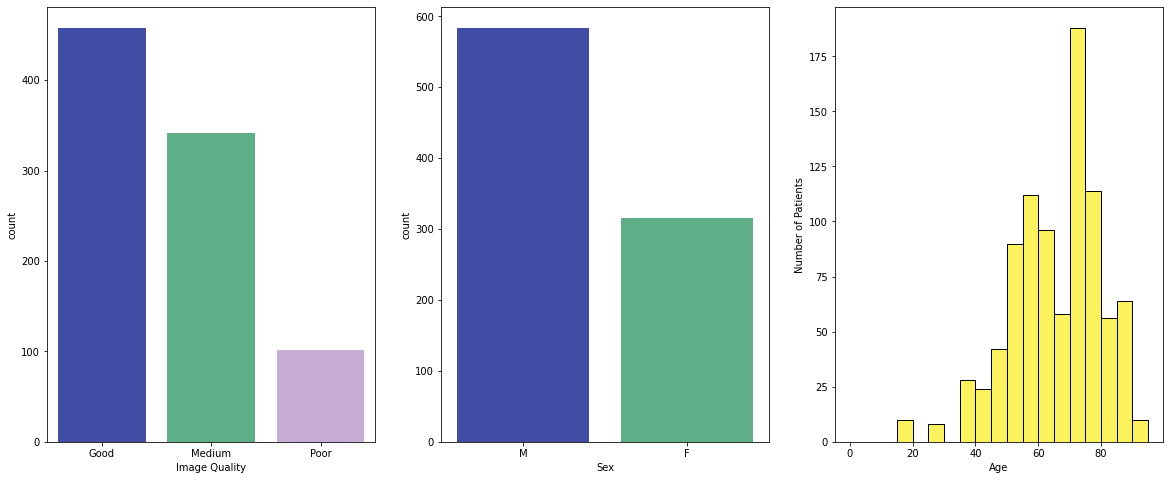

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the folder paths where the .cfg files are located
folder_path_2CH = TRAIN_2CH_INFO
folder_path_4CH = TRAIN_4CH_INFO

# Initialize an empty list to store the information from each .cfg file
cfg_data = []

# Loop through each file in the 2CH folder
for file_name in os.listdir(folder_path_2CH):
    # Check if the file has the extension .cfg
    if file_name.endswith("_info.cfg"):
        file_path = os.path.join(folder_path_2CH, file_name)
        # Open the file and read its contents
        with open(file_path, "r") as f:
            # Extract the information you need from the file
            cfg_info = {}
            for line in f:
                key, value = line.strip().split(": ")
                cfg_info[key] = value
            # Remove the '_info.cfg' suffix from the filename and use it as an ID column
            id_col = file_name.replace("_info.cfg", "")
            cfg_info["id"] = id_col
            # Add a column to indicate the file is 2CH
            cfg_info["file_type"] = "2CH"
            # Append the information to the list
            cfg_data.append(cfg_info)

# Loop through each file in the 4CH folder
for file_name in os.listdir(folder_path_4CH):
    # Check if the file has the extension .cfg
    if file_name.endswith("_info.cfg"):
        file_path = os.path.join(folder_path_4CH, file_name)
        # Open the file and read its contents
        with open(file_path, "r") as f:
            # Extract the information you need from the file
            cfg_info = {}
            for line in f:
                key, value = line.strip().split(": ")
                cfg_info[key] = value
            # Remove the '_info.cfg' suffix from the filename and use it as an ID column
            id_col = file_name.replace("_info.cfg", "")
            cfg_info["id"] = id_col
            # Add a column to indicate the file is 4CH
            cfg_info["file_type"] = "4CH"
            # Append the information to the list
            cfg_data.append(cfg_info)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(cfg_data)
# Set the 'id' column as the index
df.set_index("id", inplace=True)

# Filter for 2CH data
df_2CH = df.loc[df['file_type'] == '2CH']

# Create the chart
fig, axs = plt.subplots(ncols=3, figsize=(20,8))
sns.countplot(df['ImageQuality'], ax=axs[0], palette=['#3040B5', '#50BD87', '#CAA5D9'])
axs[0].set_xlabel('Image Quality')
sns.countplot(df['Sex'], ax=axs[1], palette={"M": "#3040B5", "F": "#50BD87"})
axs[1].set_xlabel('Sex')
sns.histplot(df['Age'].apply(lambda x: int(x)), ax=axs[2], kde=False, bins=range(0, 100, 5), color='#FCEE28')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Number of Patients')
plt.show()



<AxesSubplot:xlabel='LVef', ylabel='Count'>

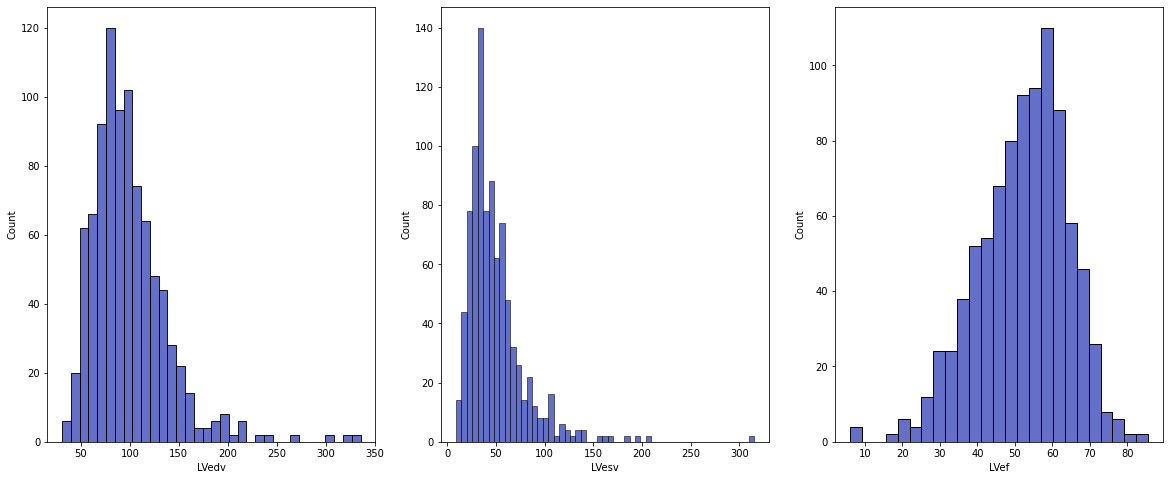

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20,8))
sns.histplot(df['LVedv'].apply(lambda x: float(x)), ax=axs[0], color='#3040B5')
sns.histplot(df['LVesv'].apply(lambda x: float(x)), ax=axs[1], color='#3040B5')
sns.histplot(df['LVef'].apply(lambda x: float(x)), ax=axs[2], color='#3040B5')

### Randomly Select 6 imanges and mask

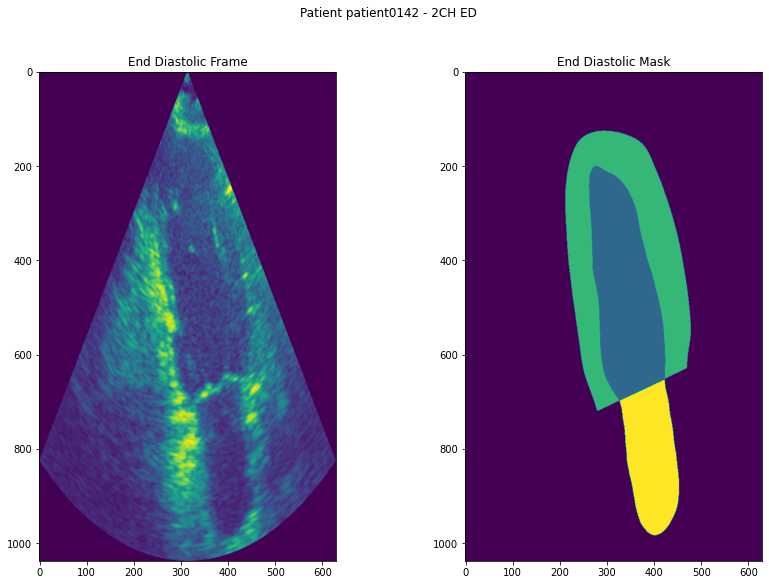

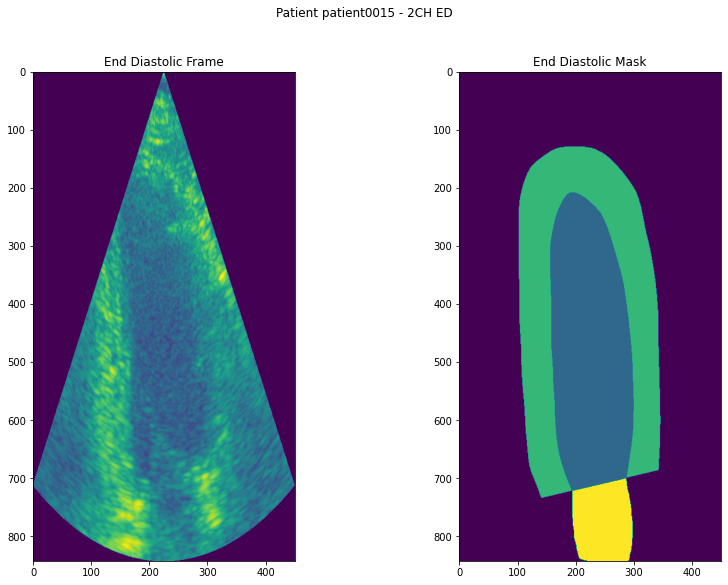

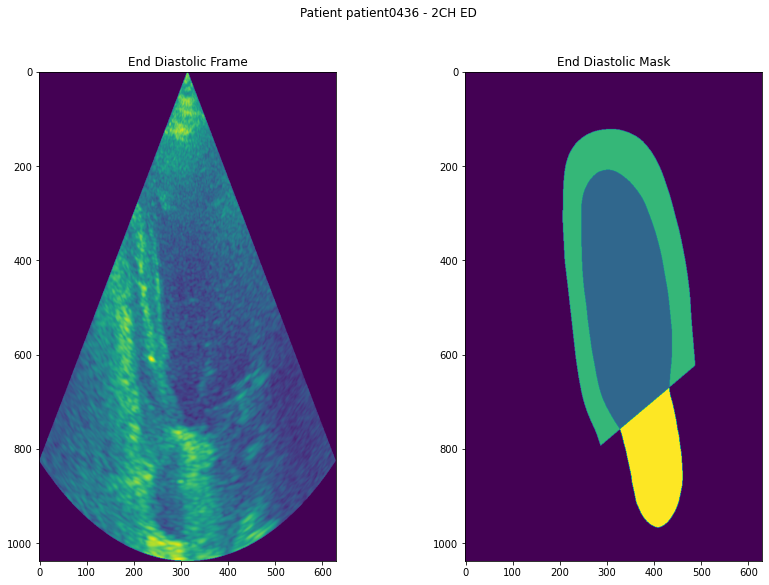

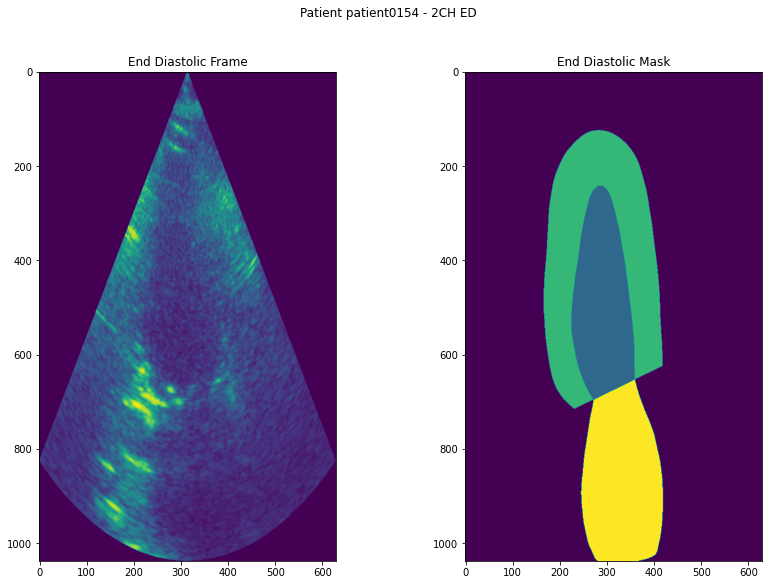

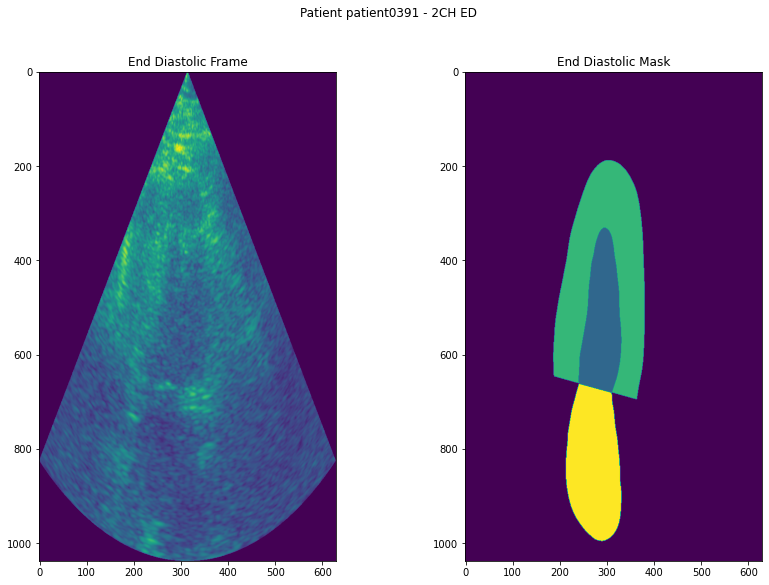

In [ ]:
import os
import random

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

train_path = "/content/drive/MyDrive/LVEF/CAMUS/original_data/data/training/2ch/"

def mhd_to_array(path):
    """
    Read an *.mhd file stored in path and return it as a numpy array.
    """
    return sitk.GetArrayFromImage(sitk.ReadImage(path, sitk.sitkFloat32))

# Select 6 random patients
patient_list = [f for f in os.listdir(os.path.join(train_path, "frames")) if "mhd" in f and not f.endswith(".raw")]
random_patients = random.sample(patient_list, 6)

# Plot the images and masks
for i, patient in enumerate(random_patients):
    fig, ax = plt.subplots(ncols=2)
    image_path = os.path.join(train_path, "frames", patient)
    mask_path = os.path.join(train_path, "masks", patient.replace(".mhd", "_gt.mhd"))
    image = mhd_to_array(image_path)
    mask = mhd_to_array(mask_path)
    ax[0].imshow(image[0]) # End Diastolic frame
    ax[1].imshow(mask[0]) # End Diastolic mask

    # Set titles
    ax[0].set_title('End Diastolic Frame')
    ax[1].set_title('End Diastolic Mask')

    # Show image ID
    fig.suptitle(f'Patient {patient.split("_")[0]} - 2CH ED')

    plt.show()


### Distribution Plot

In [ ]:
import SimpleITK as sitk
import numpy as np

def mhd_to_array(path):
    """
    Read an *.mhd file stored in path and return it as a numpy array.
    """
    return sitk.GetArrayFromImage(sitk.ReadImage(path, sitk.sitkFloat32))


def plot_image_histogram(train_path):
    """
    Generates histograms of the widths and lengths of the images in the training set.

    Args:
    train_path (str): Path to the training data.

    Returns:
    None
    """
    widths = []
    lengths = []
    for i in os.listdir(os.path.join(train_path, "frames")):
        if i.endswith(".mhd"):
            image_array = mhd_to_array(os.path.join(train_path, "frames", i))
            widths.append(image_array.shape[2])
            lengths.append(image_array.shape[1])

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axs[0].hist(widths, bins=15)
    axs[0].set_title("Widths Histogram")
    axs[0].set_xlabel("Widths")
    axs[0].set_ylabel("Frequency")

    axs[1].hist(lengths, bins=15)
    axs[1].set_title("Lengths Histogram")
    axs[1].set_xlabel("Lengths")
    axs[1].set_ylabel("Frequency")

    plt.show()


In [ ]:
plot_image_histogram(train_path)